In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns;

In [5]:
folder = input("Please give the folder path containing your hpxmp and openmp data:")
bench_name = input("Enter your bench name:")
merged_hpxmp = open(folder+"/merged_hpxmp.csv","w+")
for line in open(folder+"/hpxmp_"+bench_name+"_2th_run.csv"):
    merged_hpxmp.write(line)
for num in range(3,12):
    f = open(folder+"/hpxmp_"+bench_name+"_"+str(num)+"th_run.csv")
    f.__next__() #skip the header
    for line in f:
        merged_hpxmp.write(line)
    f.close()
merged_hpxmp.close()

merged_openmp = open(folder+"/merged_openmp.csv","w+")    
for line in open(folder+"/openmp_"+bench_name+"_2th_run.csv"):
    merged_openmp.write(line)
for num in range(3,12):
    f = open(folder+"/openmp_"+bench_name+"_"+str(num)+"th_run.csv")
    f.__next__() #skip the header
    for line in f:
        merged_openmp.write(line)
    f.close()
merged_openmp.close()
                 

Please give the folder path containing your hpxmp and openmp data:../result_dense_vector_marv_noht_201901031459
Enter your bench name:dense_vector


In [7]:
hpxmp = pd.read_csv(folder+"/merged_hpxmp.csv")
openmp = pd.read_csv(folder+"/merged_openmp.csv")
hpxmp.head()
openmp.head(20)

,num_threads,vector_size,mfc/s,counter
0,1,1000000,38.4882,
1,2,1000000,68.8942,
2,3,1000000,89.2220,
3,4,1000000,105.7980,
4,5,1000000,121.3300,
5,6,1000000,132.9430,
6,7,1000000,131.8910,
7,8,1000000,138.4080,
8,9,1000000,147.4270,
9,10,1000000,100.6340,


In [8]:
hpxmp_1_2 = hpxmp.groupby(['num_threads','vector_size']).mean()
hpxmp_1_2.head()
openmp_1_2 = openmp.groupby(['num_threads','vector_size']).mean()

In [9]:
hpxmp_1_2 = hpxmp_1_2.reset_index()
hpxmp_1_2.head()
openmp_1_2 = openmp_1_2.reset_index()

In [10]:
pivot_table_hpxmp = hpxmp_1_2.pivot('vector_size','num_threads','mfc/s')

In [11]:
pivot_table_openmp = openmp_1_2.pivot('vector_size','num_threads','mfc/s')

how many distinct thread do you have?16
how many vector size group do you have?10


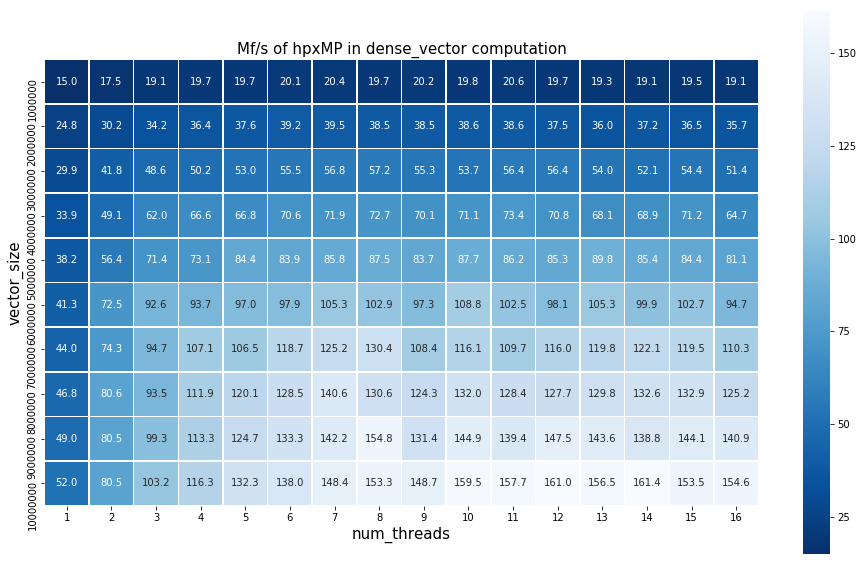

In [14]:
num_thr=int(input("how many distinct thread do you have?"))
num_vsz=int(input("how many vector size group do you have?"))
plt.figure(figsize=(num_thr,num_vsz))
plt.xlabel('num_threads', size = 15)
plt.ylabel('vector_size',size = 15)
plt.title('Mf/s of hpxMP in '+bench_name+' computation',size = 15)
sns_plot_hpxmp = sns.heatmap(pivot_table_hpxmp,annot=True, fmt=".1f",linewidths=.5, square=True,cmap='Blues_r')


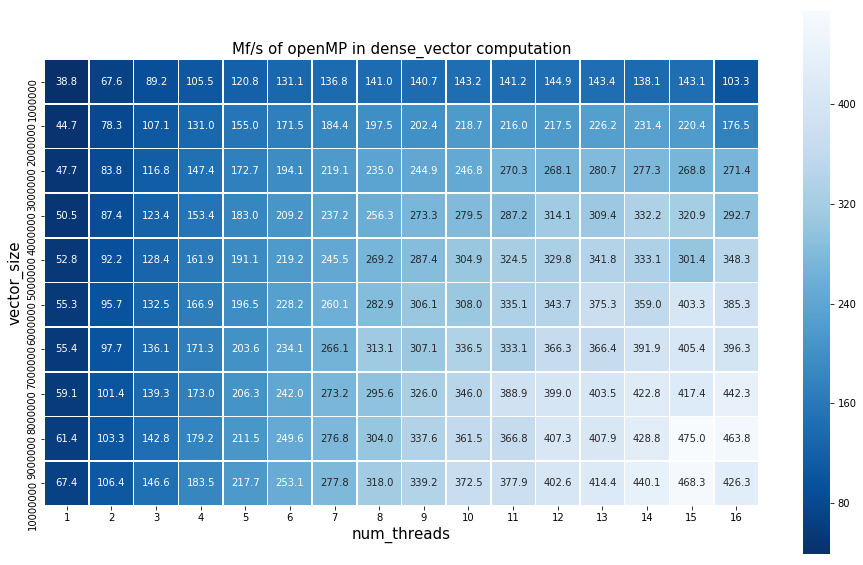

In [15]:
plt.figure(figsize=(num_thr,num_vsz))
pivot_table_openmp = openmp_1_2.pivot('vector_size','num_threads','mfc/s')
plt.xlabel('num_threads', size = 15)
plt.ylabel('vector_size',size = 15)
plt.title('Mf/s of openMP in '+bench_name+' computation',size = 15)
sns_plot_openmp = sns.heatmap(pivot_table_openmp,annot=True, fmt=".1f",linewidths=.5, square=True,cmap='Blues_r')

In [16]:
figure_hpxmp = sns_plot_hpxmp.get_figure()
figure_hpxmp.savefig(folder+"/hpxmp")
figure_openmp = sns_plot_openmp.get_figure()
figure_openmp.savefig(folder+"/openmp")

In [17]:
pivot_table_diff = pivot_table_hpxmp/pivot_table_openmp

In [18]:
pivot_table_diff.head(16)

num_threads,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
vector_size,,,,,,,,,,,,,,,,
1000000,0.386136,0.258353,0.214391,0.186437,0.163011,0.153555,0.149080,0.139780,0.143794,0.138335,0.145848,0.135733,0.134818,0.138128,0.136380,0.184492
2000000,0.554962,0.385530,0.319125,0.277498,0.242607,0.228398,0.213978,0.194805,0.190015,0.176559,0.178953,0.172306,0.159013,0.160699,0.165773,0.202254
3000000,0.627810,0.498438,0.415760,0.340454,0.307076,0.286053,0.259091,0.243437,0.225714,0.217590,0.208645,0.210460,0.192297,0.187844,0.202443,0.189295
4000000,0.670207,0.562108,0.502136,0.434226,0.365188,0.337369,0.303206,0.283448,0.256639,0.254370,0.255606,0.225393,0.219956,0.207480,0.222039,0.220980
5000000,0.723567,0.611128,0.555637,0.451629,0.441692,0.382848,0.349516,0.325031,0.291308,0.287518,0.265464,0.258621,0.262836,0.256476,0.279897,0.232914
6000000,0.747449,0.757299,0.698711,0.561248,0.493886,0.429312,0.404988,0.363672,0.317861,0.353279,0.306046,0.285272,0.280634,0.278256,0.254791,0.245885
7000000,0.794673,0.760120,0.695630,0.625115,0.522909,0.507010,0.470515,0.416477,0.352910,0.345135,0.329349,0.316830,0.326806,0.311614,0.294797,0.278355
8000000,0.791062,0.794822,0.671465,0.646720,0.582086,0.530880,0.514608,0.441949,0.381176,0.381640,0.330102,0.320135,0.321525,0.313524,0.318465,0.283075
9000000,0.797469,0.779135,0.695215,0.632391,0.589595,0.534175,0.513782,0.509192,0.389162,0.400718,0.380090,0.362148,0.351949,0.323756,0.303361,0.303688


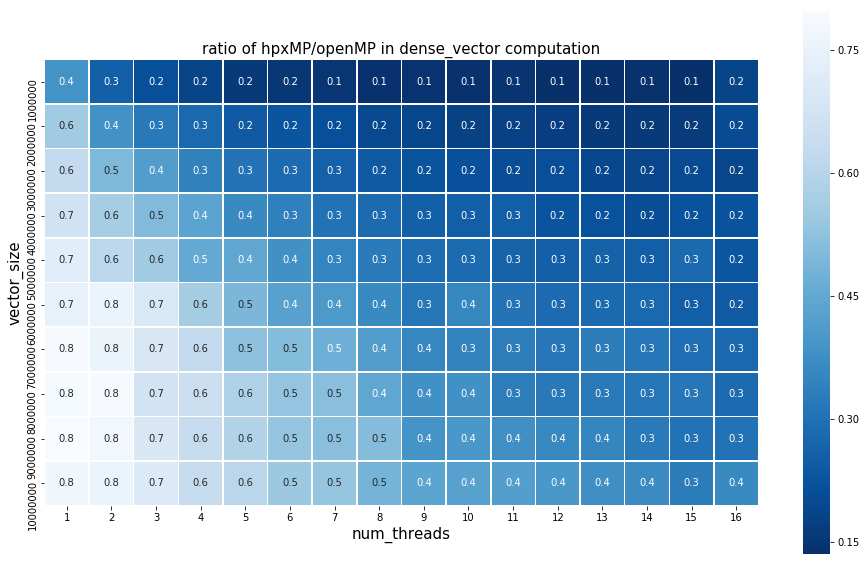

In [19]:
plt.figure(figsize=(num_thr,num_vsz))
plt.xlabel('num_threads', size = 15)
plt.ylabel('vector_size',size = 15)
plt.title('ratio of hpxMP/openMP in '+bench_name+' computation',size = 15)
sns_plot_diff = sns.heatmap(pivot_table_diff,annot=True, fmt=".1f",linewidths=.5, square=True,cmap='Blues_r')

In [20]:
figure_diff = sns_plot_diff.get_figure()
figure_diff.savefig(folder+"/hpxmp_openmp_diff")